In [73]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
import jax
import jax.numpy as jnp

Question 1:

The number of multiplications and additions will be N * M * K and N * M * (K-1) respectively. Each cell of the resulting matrix with size N * M will need K multiplications.  
Since we need to sum K values per cell in the resulting matrix, we will need K-1 additions. Hence, the total number of additions will be N * M * (K-1).

Question 2:

The implementation of the numpy module is in C++. Since Python is slower than C++, the result of the numpy matrix multiplication will be far faster than manual implementations

In [74]:
def mat_mul(a, b):
    f = []

    for r in a:
        f.append([])
        for c in zip(*b):
            f[-1].append(sum(i * j for i, j in zip(r, c)))

    return f


a = np.random.randint(1, 10, size=(10, 10)).tolist()
b = np.random.randint(1, 10, size=(10, 10)).tolist()


def first_func():
    return mat_mul(a, b)


def second_func():
    return (np.array(a) @ np.array(b)).tolist()


exec_time_1 = timeit.timeit(first_func, number=10000)
exec_time_2 = timeit.timeit(second_func, number=10000)

print('Is result the same?', first_func() == second_func())
print('List multiplication time:', exec_time_1)
print('Numpy multiplication time:', exec_time_2)

Is result the same? True
List multiplication time: 1.1744267650001348
Numpy multiplication time: 0.18009702399967864


Question 3: There would be N/2 linear passes, hence the time complexity will be O(N^2) with the naive method. There are various methods such as sorting and taking the middle element for O(N log N) or quickselect for a runtime of Θ(N). I will implement the sorting method as it is fast enough in practice. It can be noted that without the .tolist() function, numpy performs far faster. 

In [75]:
def first_func(a=None):
    if a is None:
        a = np.random.randint(1, 10 ** 9, size=10000).tolist()
    a.sort()

    med = a[len(a) // 2]
    if len(a) % 2 == 0:
        med = (med + a[len(a) // 2 - 1]) / 2

    return med


def second_func(a=None):
    if a is None:
        a = np.random.randint(1, 10 ** 9, size=10000).tolist()

    return np.median(a)


x = np.random.randint(1, 10 ** 9, size=10000).tolist()

print('Is result the same?', second_func(x) == first_func(x))

exec_time_1 = timeit.timeit(first_func, number=1000)
exec_time_2 = timeit.timeit(second_func, number=1000)

print('Sorting Median time:', exec_time_1)
print('Numpy Median time:', exec_time_2)

Is result the same? True
Sorting Median time: 1.9117696650000653
Numpy Median time: 0.8075816730001861


Question 4:

In [76]:
from IPython.display import display, Math

display(Math(r'\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)'))
display(Math(r'\nabla f(x, y) = \left( 2xy + y^3 \cos x, x^2 + 3y^2 \sin x \right)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Question 5:

In [77]:
jf = jax.grad(lambda x, y: x ** 2 * y + y ** 3 * jnp.sin(x), argnums=(0, 1))
rf = lambda x, y: (2 * x * y + y ** 3 * jnp.cos(x), x ** 2 + 3 * y ** 2 * jnp.sin(x))

for x, y in zip(np.random.rand(10), np.random.rand(3)):
    v1, v2 = jf(x, y), rf(x, y)
    m1 = np.round(v1[0], 3), np.round(v1[1], 3)
    m2 = np.round(v2[0], 3), np.round(v2[1], 3)
    print('Are equal?', m1 == m2)
    print(m1, m2)

Are equal? True
(Array(1.8180001, dtype=float32), Array(2.364, dtype=float32)) (Array(1.8180001, dtype=float32), Array(2.364, dtype=float32))
Are equal? True
(Array(0.36100003, dtype=float32), Array(0.85800004, dtype=float32)) (Array(0.36100003, dtype=float32), Array(0.85800004, dtype=float32))
Are equal? True
(Array(0.44200003, dtype=float32), Array(0.377, dtype=float32)) (Array(0.44200003, dtype=float32), Array(0.377, dtype=float32))


Question 6:

In [78]:
cx, cy = sp.symbols('x y')
f = cx ** 2 * cy + cy ** 3 * sp.sin(cx)

dx, dy = sp.diff(f, cx), sp.diff(f, cy)

sf = lambda x, y: (sp.lambdify((cx, cy), dx, 'numpy')(x, y), sp.lambdify((cx, cy), dy, 'numpy')(x, y))
rf = lambda x, y: (2 * x * y + y ** 3 * np.cos(x), x ** 2 + 3 * y ** 2 * np.sin(x))

for x, y in zip(np.random.rand(10), np.random.rand(3)):
    v1, v2 = sf(x, y), rf(x, y)
    m1 = np.round(v1[0], 3), np.round(v1[1], 3)
    m2 = np.round(v2[0], 3), np.round(v2[1], 3)
    print('Are equal?', m1 == m2)
    print(m1, m2)

Are equal? True
(np.float64(0.2), np.float64(0.09)) (np.float64(0.2), np.float64(0.09))
Are equal? True
(np.float64(0.723), np.float64(0.215)) (np.float64(0.723), np.float64(0.215))
Are equal? True
(np.float64(1.964), np.float64(2.094)) (np.float64(1.964), np.float64(2.094))


Question 7:

In [79]:
{
    "2022": {
        "AI": {
            "1": {
                "Name": "Arjun",
                "Marks": {
                    "Math": 88,
                    "English": 86,
                    "Biology": 94,
                    "Philosophy": 84
                }
            },
            "2": {
                "Name": "Vihaan",
                "Marks": {
                    "Math": 99,
                    "English": 80,
                    "Biology": 100,
                    "Philosophy": 96
                }
            }
        },
        "CSE": {
            "3": {
                "Name": "Amiyah",
                "Marks": {
                    "Math": 84,
                    "English": 100,
                    "Biology": 81,
                    "Philosophy": 86
                }
            },
            "4": {
                "Name": "Rohan",
                "Marks": {
                    "Math": 87,
                    "English": 98,
                    "Biology": 93,
                    "Philosophy": 86
                }
            }
        }
    },
    "2023": {
        "AI": {
            "1": {
                "Name": "Noor",
                "Marks": {
                    "Math": 85,
                    "English": 95,
                    "Biology": 93,
                    "Philosophy": 82
                }
            },
            "2": {
                "Name": "Lina",
                "Marks": {
                    "Math": 96,
                    "English": 95,
                    "Biology": 97,
                    "Philosophy": 92
                }
            }
        },
        "CSE": {
            "3": {
                "Name": "Aditya",
                "Marks": {
                    "Math": 98,
                    "English": 91,
                    "Biology": 94,
                    "Philosophy": 95
                }
            },
            "4": {
                "Name": "Saanvi",
                "Marks": {
                    "Math": 87,
                    "English": 86,
                    "Biology": 87,
                    "Philosophy": 81
                }
            }
        }
    },
    "2024": {
        "AI": {
            "1": {
                "Name": "Pranav",
                "Marks": {
                    "Math": 96,
                    "English": 99,
                    "Biology": 81,
                    "Philosophy": 81
                }
            },
            "2": {
                "Name": "Dhruv",
                "Marks": {
                    "Math": 88,
                    "English": 92,
                    "Biology": 84,
                    "Philosophy": 87
                }
            }
        },
        "CSE": {
            "3": {
                "Name": "Ananya",
                "Marks": {
                    "Math": 82,
                    "English": 97,
                    "Biology": 98,
                    "Philosophy": 85
                }
            },
            "4": {
                "Name": "Diya",
                "Marks": {
                    "Math": 89,
                    "English": 87,
                    "Biology": 92,
                    "Philosophy": 84
                }
            }
        }
    },
    "2025": {
        "AI": {
            "1": {
                "Name": "Amani",
                "Marks": {
                    "Math": 96,
                    "English": 87,
                    "Biology": 93,
                    "Philosophy": 90
                }
            },
            "2": {
                "Name": "Ayanna",
                "Marks": {
                    "Math": 85,
                    "English": 87,
                    "Biology": 82,
                    "Philosophy": 93
                }
            }
        },
        "CSE": {
            "3": {
                "Name": "Shaurya",
                "Marks": {
                    "Math": 91,
                    "English": 85,
                    "Biology": 90,
                    "Philosophy": 96
                }
            },
            "4": {
                "Name": "Jai",
                "Marks": {
                    "Math": 93,
                    "English": 83,
                    "Biology": 100,
                    "Philosophy": 80
                }
            }
        }
    }
}

{'2022': {'AI': {'1': {'Name': 'Arjun',
    'Marks': {'Math': 88, 'English': 86, 'Biology': 94, 'Philosophy': 84}},
   '2': {'Name': 'Vihaan',
    'Marks': {'Math': 99, 'English': 80, 'Biology': 100, 'Philosophy': 96}}},
  'CSE': {'3': {'Name': 'Amiyah',
    'Marks': {'Math': 84, 'English': 100, 'Biology': 81, 'Philosophy': 86}},
   '4': {'Name': 'Rohan',
    'Marks': {'Math': 87, 'English': 98, 'Biology': 93, 'Philosophy': 86}}}},
 '2023': {'AI': {'1': {'Name': 'Noor',
    'Marks': {'Math': 85, 'English': 95, 'Biology': 93, 'Philosophy': 82}},
   '2': {'Name': 'Lina',
    'Marks': {'Math': 96, 'English': 95, 'Biology': 97, 'Philosophy': 92}}},
  'CSE': {'3': {'Name': 'Aditya',
    'Marks': {'Math': 98, 'English': 91, 'Biology': 94, 'Philosophy': 95}},
   '4': {'Name': 'Saanvi',
    'Marks': {'Math': 87, 'English': 86, 'Biology': 87, 'Philosophy': 81}}}},
 '2024': {'AI': {'1': {'Name': 'Pranav',
    'Marks': {'Math': 96, 'English': 99, 'Biology': 81, 'Philosophy': 81}},
   '2': {'Name'

Question 8:

In [80]:
class College:
    def __init__(self):
        self.batches = {}

    def add_year(self, year, batch):
        self.batches[year] = batch


class Batch:
    def __init__(self):
        self.branches = {}

    def add_student(self, branch, student):
        self.branches[branch] = self.branches.get(branch, []) + [student]


class Student:
    def __init__(self, roll, name):
        self.roll = roll
        self.name = name
        self.marks = {}

    def add_marks(self, subject, marks):
        self.marks[subject] = marks


c = College()
b = Batch()
s = Student(23110321, 'Srivaths')

s.add_marks('Math', 90)
b.add_student('AI', s)
c.add_year(2022, b)

print(c.batches[2022].branches['AI'][0].name)

Srivaths


Question 9:

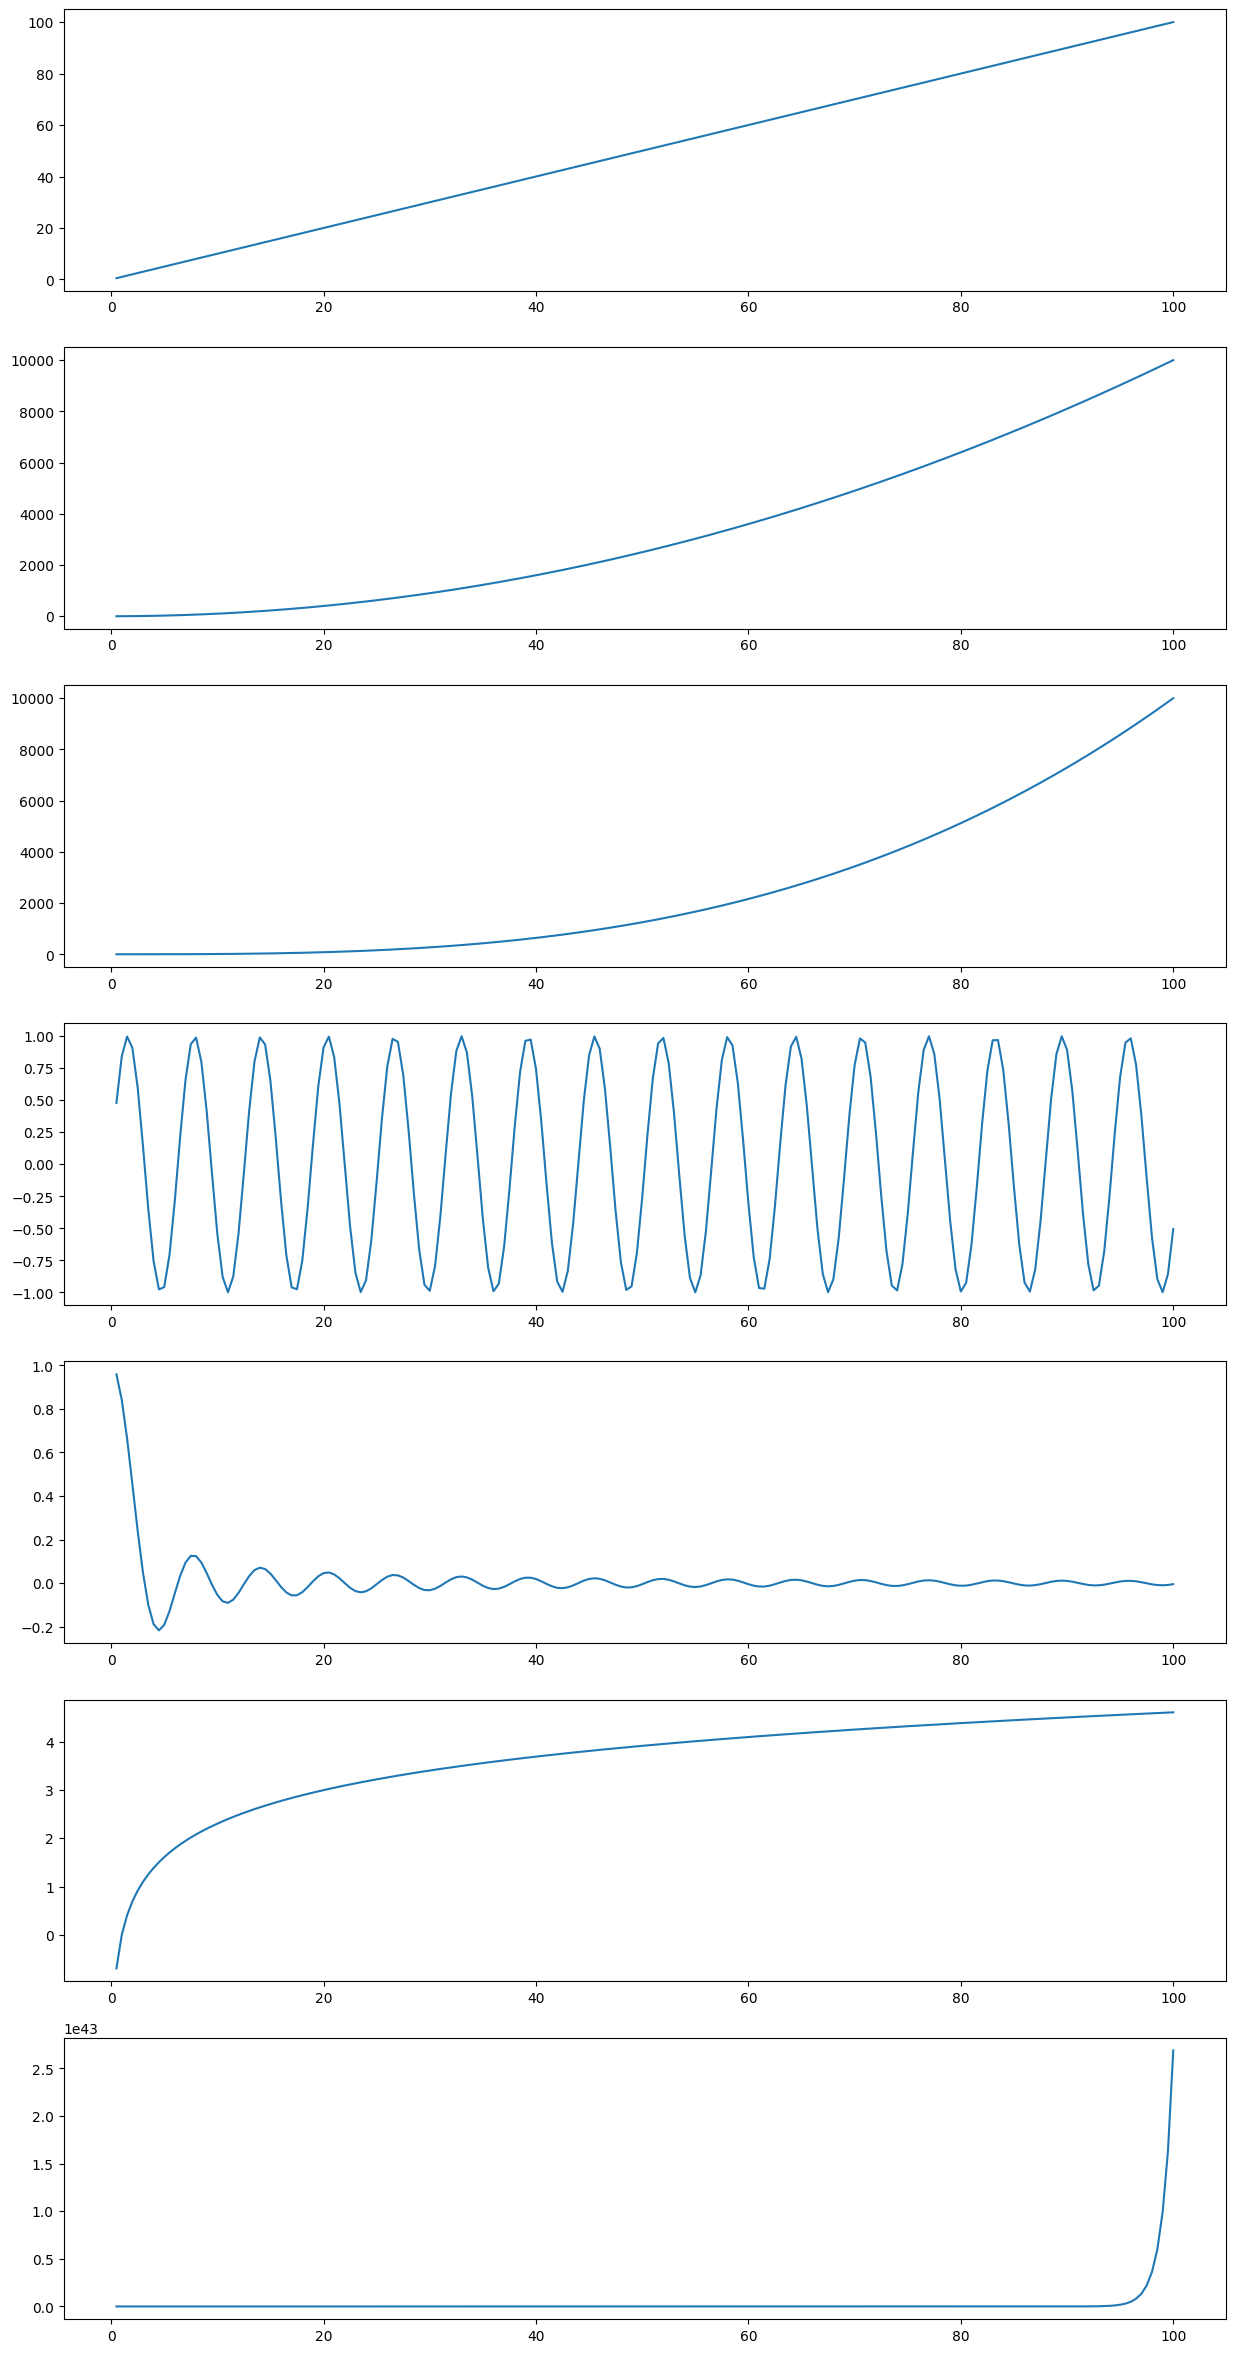

In [81]:
x = np.arange(0.5, 100.1, 0.5)

fs = [
    x,
    x ** 2,
    (x ** 3) / 100,
    np.sin(x),
    np.sin(x) / x,
    np.log(x),
    np.exp(x)
]

fig, ax = plt.subplots(7, 1, figsize=(15, 30))
for a, f in zip(ax, fs):
    a.plot(x, f)

Question 10:

In [82]:
a = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(a, columns=('a', 'b', 'c', 'd', 'e'))
df

,a,b,c,d,e
0,1.669362,1.912757,1.135770,1.231455,1.345358
1,1.851664,1.821491,1.431765,1.656967,1.609943
2,1.261616,1.998147,1.472491,1.854141,1.683380
3,1.928805,1.014583,1.963780,1.436616,1.082451
4,1.531122,1.797056,1.542565,1.524869,1.808297
5,1.138645,1.808191,1.097812,1.016068,1.479821
6,1.408575,1.720796,1.534307,1.584374,1.727204
7,1.410302,1.966219,1.493187,1.538183,1.362241
8,1.363316,1.067701,1.616499,1.175120,1.113966
9,1.602857,1.165607,1.251666,1.825010,1.490711


Question 11:

Reference - https://numpy.org/doc/stable/user/basics.broadcasting.html  
Broadcasting defines how numpy deals with different shaped arrays during operations. Broadcasting works only when the dimensions are equal OR when one of them is 1. 

In [83]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])  # 3x3 matrix

b = np.array([1, 2, 3])  # 1x3 matrix

print(a + b)  # outputs a 3x3 matrix with b added to every row of a

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


Question 12: 

In [89]:
def argmin(a):
    mn, mv = float('inf'), -1
    for i in range(len(a)):
        for j in range(len(a[0])):
            if mn > a[i][j]:
                mn = a[i][j]
                mv = i * len(a) + j

    return mv


a = np.random.randint(1, 10, (4, 4))

x, y = argmin(a), np.argmin(a)
print(a)
print(x, y)
print('Is equal?', x == y)

[[3 1 8 6]
 [3 6 6 9]
 [9 8 8 7]
 [4 3 8 6]]
1 1
Is equal? True
